In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_df = "data/mouse_drug_data.csv"
clinical_df = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_df)
clinical_df = pd.read_csv(clinical_df)

# Combine the data into a single dataset
mouse_clinical_data = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
mouse_clinical_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
drug = mouse_clinical_data.groupby("Drug")
timepoint = mouse_clinical_data.groupby("Timepoint")

count_timepoint = timepoint['Timepoint'].count()
count_timepoint

Timepoint
0     252
5     240
10    225
15    209
20    197
25    184
30    172
35    155
40    142
45    130
Name: Timepoint, dtype: int64

In [3]:
count_drug = drug['Drug'].count()
count_drug

Drug
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     194
Zoniferol    182
Name: Drug, dtype: int64

## Tumor Response to Treatment

In [17]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_Treatment = mouse_clinical_data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

# Convert to DataFrame
TVM = Tumor_Treatment.groupby(['Drug', 'Timepoint']).mean()

TVM_pd = pd.DataFrame(TVM)
# Preview DataFrame
TVM_pd

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [16]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
from scipy import stats

Tumor_Treatment = mouse_clinical_data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

# Convert to DataFrame
TVM = Tumor_Treatment.groupby(['Drug', 'Timepoint']).sem()
TVM


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [6]:
# Minor Data Munging to Re-Format the Data Frames
#Capomulin    230
#Infubinol    178
#Ketapril     188
#Placebo      181

In [9]:
tumor_plot_pre = TVM.unstack(0)
tumor_plot_df = tumor_plot_pre["Tumor Volume (mm3)"]
tumor_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


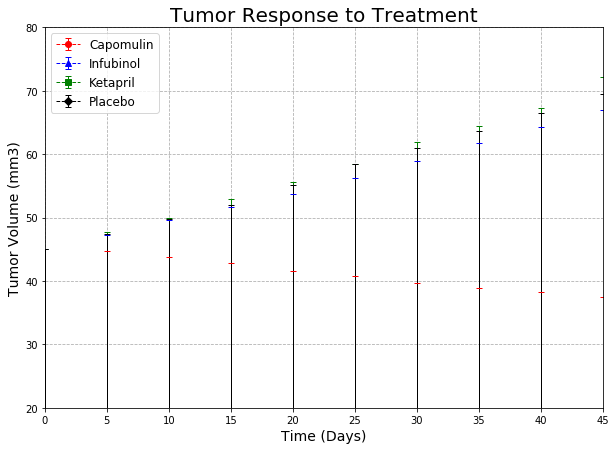

In [15]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

error = TVM_pd["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = TVM_pd["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = TVM_pd["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = TVM_pd["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()


plt.show()


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_treat = mouse_clinical_data[['Drug', 'Timepoint', 'Metastatic Sites']]

# Convert to DataFrame
MET = met_treat.groupby(['Drug', 'Timepoint']).mean()

MET_pd = pd.DataFrame(TVM)


# Preview DataFrame
MET_pd

In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_treat = mouse_clinical_data[['Drug', 'Timepoint', 'Metastatic Sites']]

# Convert to DataFrame
MET = met_treat.groupby(['Drug', 'Timepoint']).sem()

# Preview DataFrame
MET

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [19]:
# Minor Data Munging to Re-Format the Data Frames
meta_plot_pre = MET.unstack(0)
meta_plot_df = meta_plot_pre["Metastatic Sites"]
meta_plot_df.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


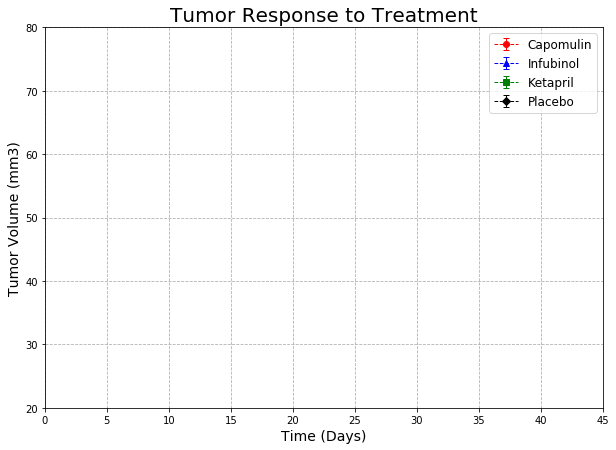

In [22]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

error = MET_pd["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = MET_pd["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = MET_pd["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = MET_pd["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [29]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_clinical_data[['Drug', 'Timepoint', 'Mouse ID']]

# Convert to DataFrame
mice = mice_count.groupby(['Drug', 'Timepoint']).count()

mice_pd = pd.DataFrame(mice)

# Preview DataFrame
#mice_pd


In [35]:
pre_mice = mouse_clinical_data.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mice = pre_mice.to_frame()
mice = mice.rename(columns={"Mouse ID": "Mouse Count"})
mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [36]:
# Minor Data Munging to Re-Format the Data Frames
mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]
mice_df
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


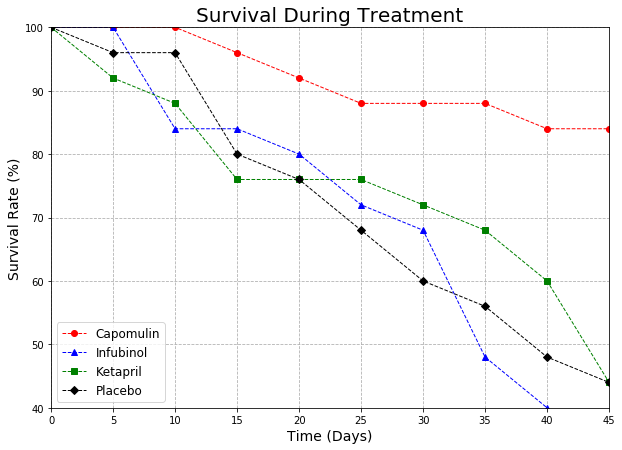

In [37]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(10,7))

cap3 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")
infu3 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")
keta3 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")
plac3 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="black")

plt.ylim(40, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [38]:
# Calculate the percent changes for each drug

capchange = ((tumor_plot_df["Capomulin"][45] - tumor_plot_df["Capomulin"][0])/45)*100
ceftchange = ((tumor_plot_df["Ceftamin"][45] - tumor_plot_df["Ceftamin"][0])/45)*100
infuchange = ((tumor_plot_df["Infubinol"][45] - tumor_plot_df["Infubinol"][0])/45)*100
ketachange = ((tumor_plot_df["Ketapril"][45] - tumor_plot_df["Ketapril"][0])/45)*100
naftchange = ((tumor_plot_df["Naftisol"][45] - tumor_plot_df["Naftisol"][0])/45)*100
placchange = ((tumor_plot_df["Placebo"][45] - tumor_plot_df["Placebo"][0])/45)*100
propchange = ((tumor_plot_df["Propriva"][45] - tumor_plot_df["Propriva"][0])/45)*100
ramichange = ((tumor_plot_df["Ramicane"][45] - tumor_plot_df["Ramicane"][0])/45)*100
stelchange = ((tumor_plot_df["Stelasyn"][45] - tumor_plot_df["Stelasyn"][0])/45)*100
zonichange = ((tumor_plot_df["Zoniferol"][45] - tumor_plot_df["Zoniferol"][0])/45)*100

drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [capchange, infuchange, ketachange, placchange]
                              })
drug_change_df


,Drug,Percent Change
0,Capomulin,2.719950
1,Infubinol,2.543172
2,Ketapril,3.229303
3,Placebo,3.003835


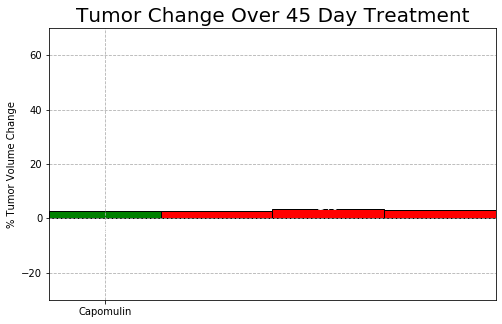

In [39]:
plt.figure(figsize=(8,5))

rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

![Metastatic Spread During Treatment](../Images/change.png)